<a href="https://colab.research.google.com/github/springboardmentor2507-alt/AI-Powered-NIDS/blob/main/SentinelNet_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KDDTrain+.csv to KDDTrain+.csv


In [ ]:
df_train = pd.read_csv("KDDTrain+.csv", header=None)

print("Train Shape:", df_train.shape)

Train Shape: (125973, 43)


In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df_train.dtypes

,0
0,int64
1,object
2,object
3,object
4,int64
5,int64
6,int64
7,int64
8,int64
9,int64


In [ ]:
df_train.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df_train.duplicated().sum()


np.int64(0)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  object 
 2   2       125973 non-null  object 
 3   3       125973 non-null  object 
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 non-null  int64  
 21  21      12

In [ ]:
df_train.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df_train.columns


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42],
      dtype='int64')

In [ ]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','attack_label','difficulty'
]

df_train.columns = columns

In [ ]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','attack_label','difficulty'
]

df_train.columns = columns

In [ ]:
dos_attacks = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'mailbomb',
               'processtable', 'udpstorm', 'worm']

probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']

r2l_attacks = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster',
               'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpgetattack', 'snmpguess',
               'httptunnel', 'sendmail', 'named']

u2r_attacks = ['rootkit', 'perl', 'loadmodule', 'ps', 'sqlattack']

In [ ]:
def map_category(label):
    label = label.strip()

    if label in dos_attacks:
        return "DoS"
    elif label in probe_attacks:
        return "Probe"
    elif label in r2l_attacks:
        return "R2L"
    elif label in u2r_attacks:
        return "U2R"
    else:
        return "Normal"

df_train["attack_category"] = df_train["attack_label"].apply(map_category)
df_train[["attack_label", "attack_category"]].head()

,attack_label,attack_category
0,normal,Normal
1,normal,Normal
2,neptune,DoS
3,normal,Normal
4,normal,Normal


In [ ]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_label', 'difficulty',
       'attack_category'],
      dtype='object')

In [ ]:
df_train['protocol_type'].unique()
df_train['service'].unique()
df_train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [ ]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_label,difficulty,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal


In [ ]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_label,difficulty,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal


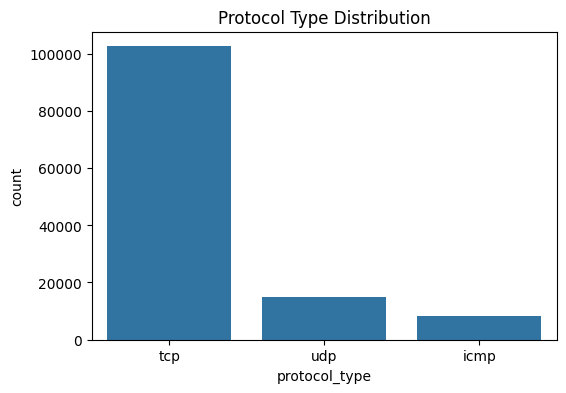

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='protocol_type', data=df_train)
plt.title('Protocol Type Distribution')
plt.show()

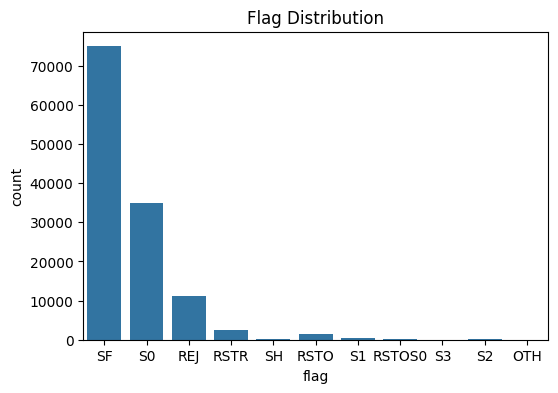

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='flag', data=df_train)
plt.title('Flag Distribution')
plt.show()

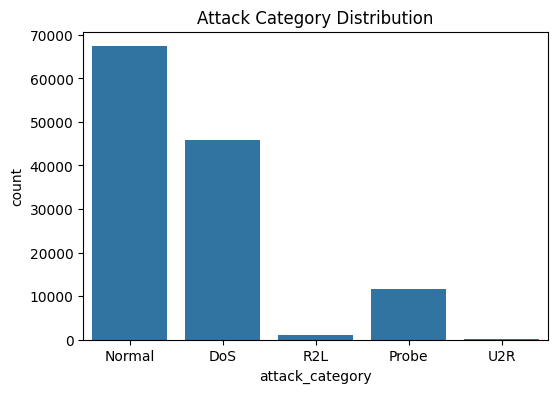

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='attack_category', data=df_train)
plt.title('Attack Category Distribution')
plt.show()

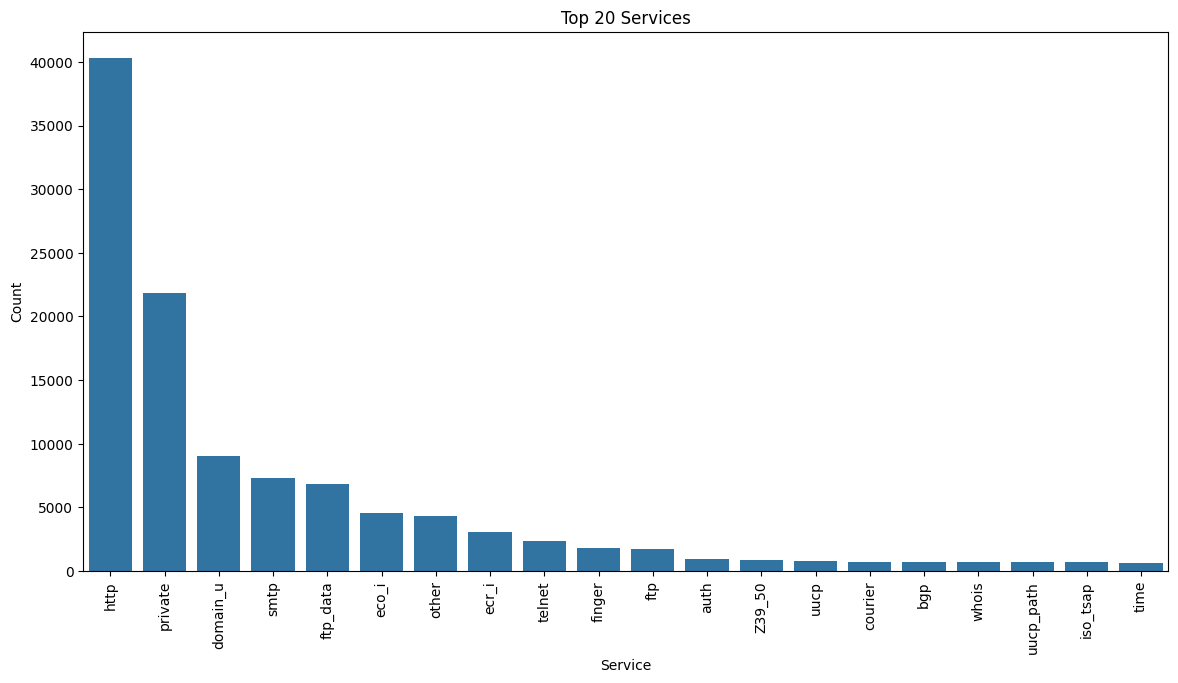

In [ ]:
service_counts = df_train.iloc[:, 2].value_counts().head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x=service_counts.index, y=service_counts.values)
plt.xticks(rotation=90)
plt.title("Top 20 Services")
plt.ylabel("Count")
plt.xlabel("Service")
plt.show()

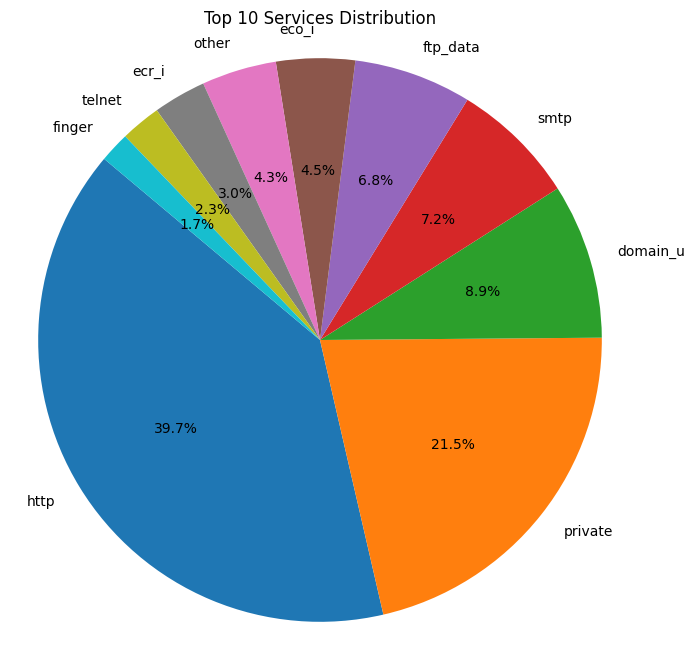

In [ ]:
service_counts = df_train['service'].value_counts().head(10)

plt.figure(figsize=(8,8))

plt.pie(
    service_counts.values,
    labels=service_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 10 Services Distribution")
plt.axis('equal')   # makes the pie perfectly circular
plt.show()

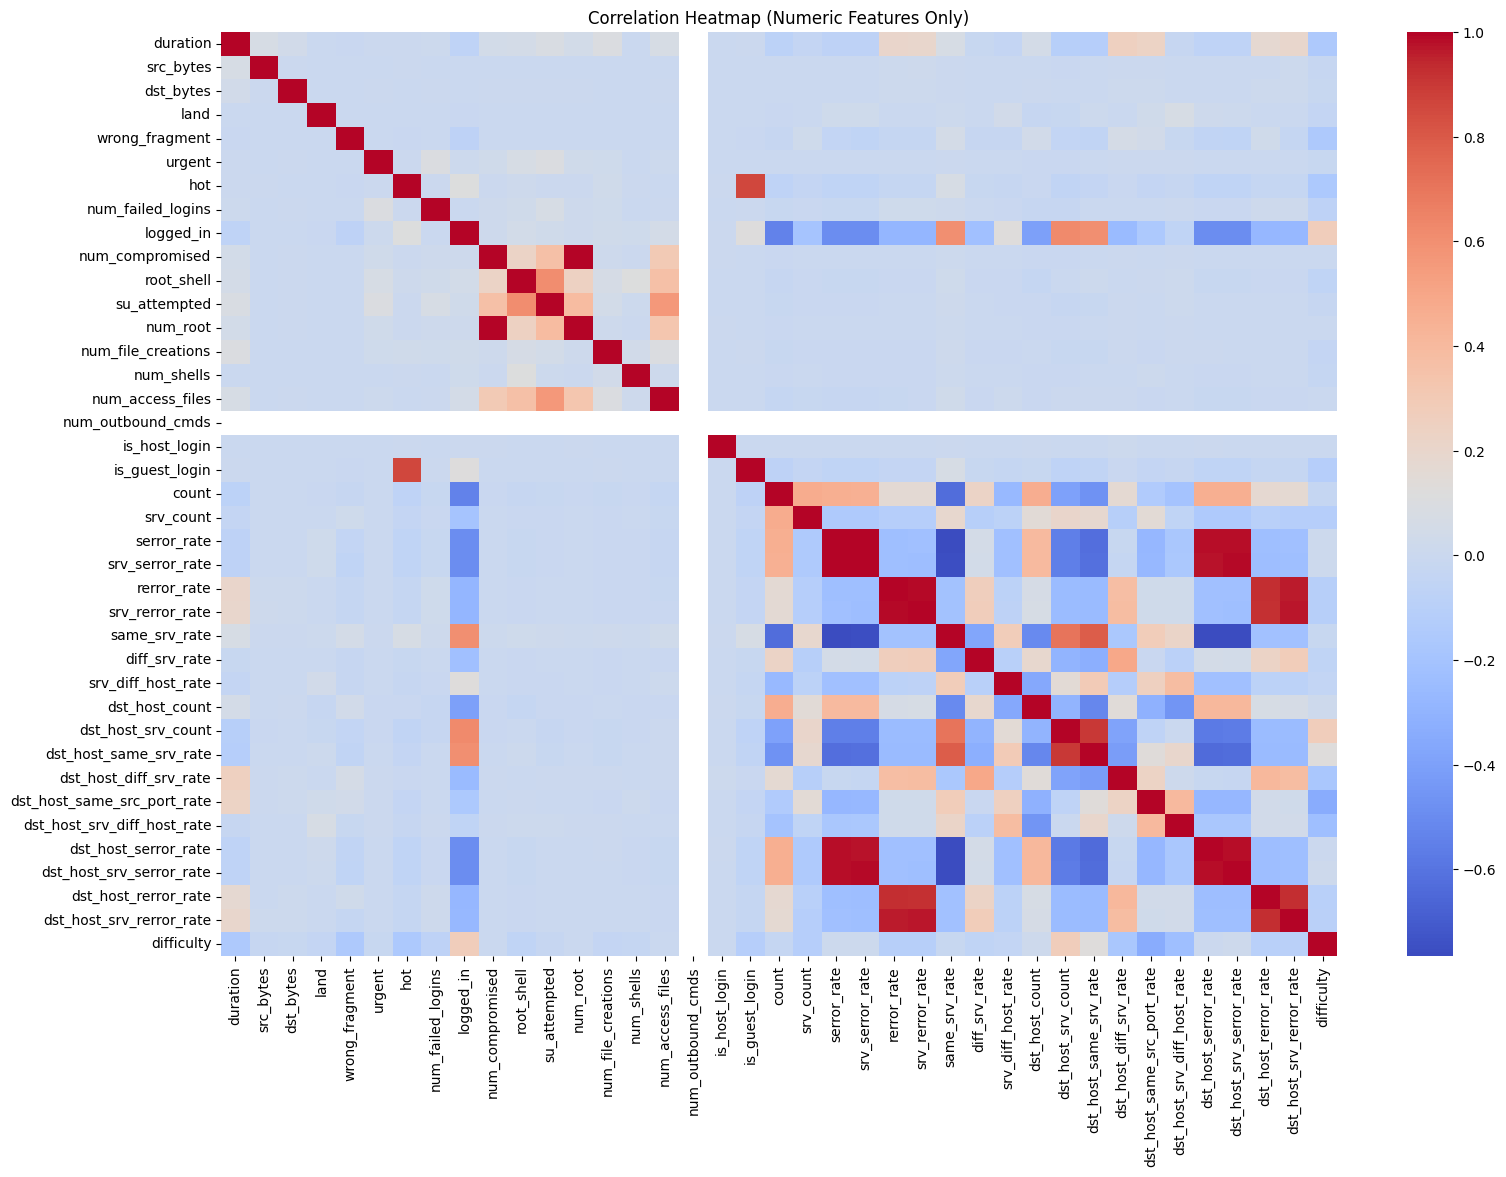

In [ ]:
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(18,12))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

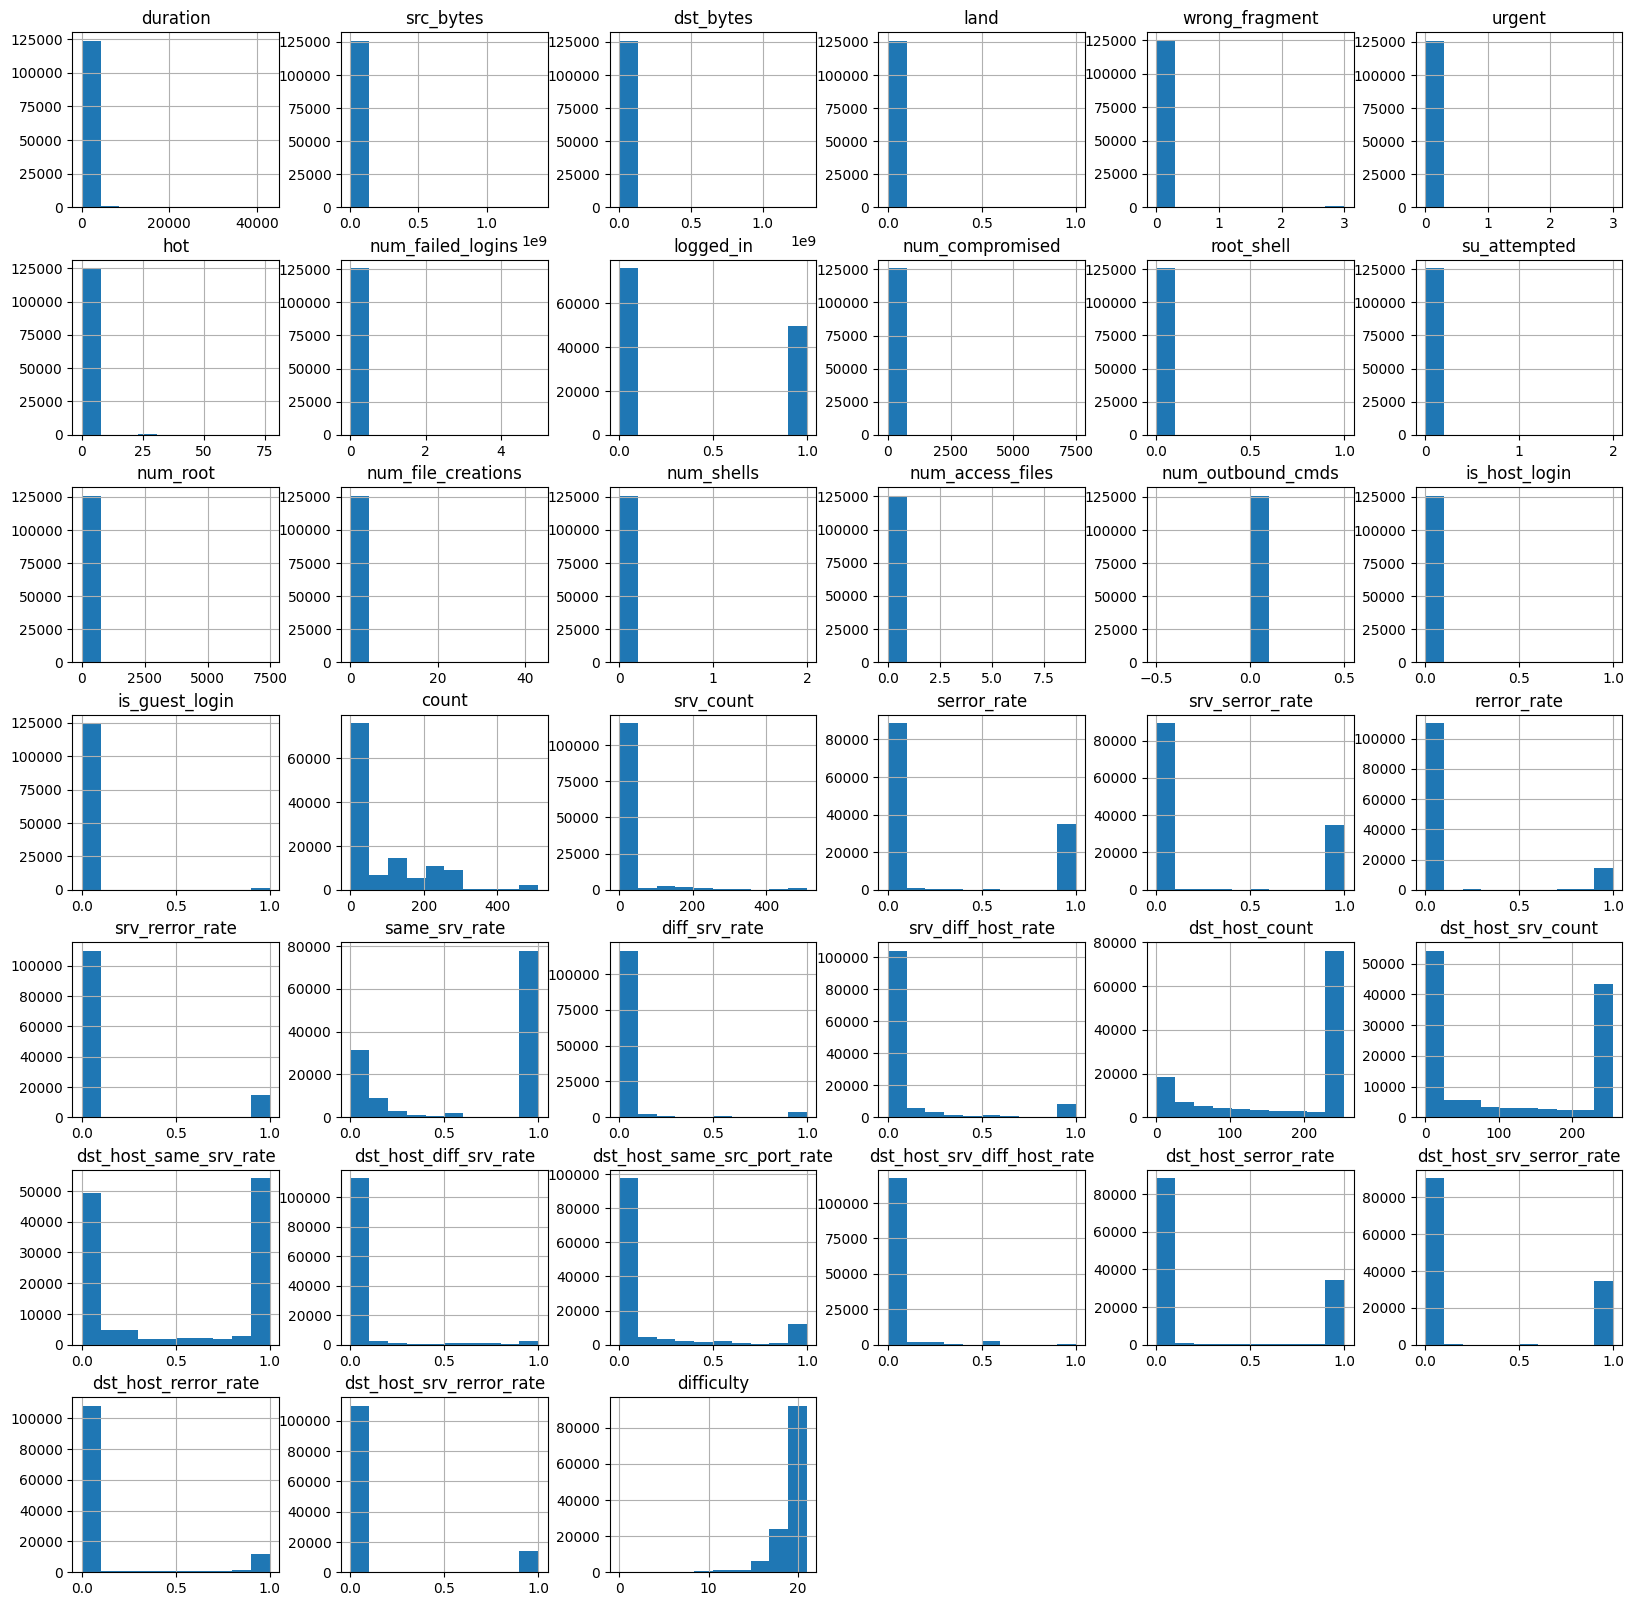

In [ ]:
df_train.hist(figsize=(20,20))
plt.show()

In [ ]:
scaler = StandardScaler()
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train[numeric_cols].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,...,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05
mean,2.549477e-17,-4.512349e-19,7.614590e-19,-4.794371e-18,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,1.558171e-17,-6.549957e-18,...,-5.815290e-17,-1.215514e-16,-2.374624e-17,2.899184e-17,3.068398e-17,1.711873e-17,-2.631264e-17,4.907180e-17,7.749960e-17,-1.369921e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,-1.044721e+00,-1.161030e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01,-8.511505e+00
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,-9.543885e-01,-1.049659e+00,-4.390782e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01,-6.563668e-01
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,-4.756270e-01,-2.504011e-02,-3.332138e-01,-4.801968e-01,-2.891034e-01,-6.395319e-01,-6.248708e-01,-3.876346e-01,-3.763870e-01,2.164263e-01
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.235694e+00,-1.166364e-02,...,1.258754e+00,1.066401e+00,-6.855302e-02,-2.860195e-01,-1.114257e-01,1.608759e+00,1.618955e+00,-3.876346e-01,-3.763870e-01,6.528229e-01
max,1.636428e+01,2.350675e+02,3.257486e+02,7.097831e+01,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.235694e+00,3.123689e+02,...,1.258754e+00,1.066401e+00,4.854138e+00,2.756092e+00,8.594782e+00,1.608759e+00,1.618955e+00,2.874410e+00,2.753914e+00,6.528229e-01


In [ ]:
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(df_train[numeric_columns])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_train_scaled.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.006692,3.302024e-05,1.509928e-05,0.000198,0.007562,0.000037,0.002655,0.000244,0.395736,0.000037,...,0.453541,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.928765
std,0.060700,4.253974e-03,3.069818e-03,0.014086,0.084510,0.004789,0.027922,0.009048,0.489010,0.003201,...,0.434128,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.109119
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039216,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143
50%,0.000000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.247059,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952381
75%,0.000000,2.000052e-07,3.939120e-07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train[['protocol_type', 'service', 'flag']].dtypes

,0
protocol_type,object
service,object
flag,object


In [ ]:
categorical_cols = ['protocol_type', 'service', 'flag']
le = LabelEncoder()

for col in categorical_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_train[categorical_cols].head()

In [ ]:
df_train[['protocol_type', 'service', 'flag']].head()

,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9


In [ ]:
X = df_train.drop(columns=['attack_category', 'attack_label'])
y = df_train['attack_category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

In [ ]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Training data shape: (88181, 42)
Testing data shape: (37792, 42)

Class distribution in training set:
attack_category
Normal    0.534820
DoS       0.364580
Probe     0.092526
R2L       0.007904
U2R       0.000170
Name: proportion, dtype: float64

Class distribution in testing set:
attack_category
Normal    0.534822
DoS       0.364575
Probe     0.092533
R2L       0.007885
U2R       0.000185
Name: proportion, dtype: float64


In [ ]:
stratify = y
y.value_counts()
y.value_counts(normalize=True) * 100

,proportion
attack_category,
Normal,53.482095
DoS,36.457812
Probe,9.252776
R2L,0.789852
U2R,0.017464


In [ ]:
print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))

Train distribution:
41
normal             0.534581
neptune            0.327165
satan              0.028836
ipsweep            0.028568
portsweep          0.023269
smurf              0.021007
nmap               0.011848
back               0.007591
teardrop           0.007085
warezclient        0.007065
pod                0.001598
guess_passwd       0.000417
buffer_overflow    0.000238
warezmaster        0.000159
land               0.000139
imap               0.000089
rootkit            0.000079
loadmodule         0.000069
multihop           0.000060
ftp_write          0.000060
perl               0.000030
phf                0.000030
spy                0.000020
Name: proportion, dtype: float64

Test distribution:
41
normal             0.534590
neptune            0.327168
satan              0.028855
ipsweep            0.028577
portsweep          0.023259
smurf              0.020996
nmap               0.011867
back               0.007581
warezclient        0.007065
teardrop           0.0070

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv("KDDTrain+.csv", header=None)

X = df.drop(columns=[41])
y = df[41]
X_encoded = X.copy()
cat_cols = X_encoded.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

if y.dtype == "object":
    le_y = LabelEncoder()
    y_encoded = le_y.fit_transform(y.astype(str))
else:
    y_encoded = y
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2,random_state=42, stratify=y_encoded)
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(pd.Series(y_train_bal).value_counts())
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_bal, y_train_bal)
y_pred = clf.predict(X_test)
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Before SMOTE:
11    53874
9     32971
17     2906
5      2879
15     2345
18     2117
10     1194
0       765
20      714
21      712
14      161
3        42
1        24
22       16
6        14
4         9
16        8
7         7
8         6
2         6
12        3
13        3
19        2
Name: count, dtype: int64

After SMOTE:
9     53874
11    53874
17    53874
10    53874
20    53874
18    53874
21    53874
5     53874
15    53874
0     53874
14    53874
3     53874
8     53874
1     53874
16    53874
22    53874
2     53874
7     53874
4     53874
6     53874
12    53874
13    53874
19    53874
Name: count, dtype: int64

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       0.83      0.83      0.83         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving KDDTrain+.csv to KDDTrain+ (1).csv


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_fscore_support)
from sklearn.model_selection import train_test_split, ParameterGrid, StratifiedKFold


In [ ]:
FEATURE_COLS = list(range(41))
LABEL_COL = 41

X = df[FEATURE_COLS].copy()
y = df[LABEL_COL].astype(str).copy()
y_binary = (y != 'normal').astype(int)


In [ ]:
Xp = X.copy()
cat_cols = Xp.select_dtypes(include=['object', 'category']).columns.tolist()
for c in cat_cols:
    Xp[c] = LabelEncoder().fit_transform(Xp[c].astype(str))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xp)


In [ ]:
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_vis = PCA(n_components=2, random_state=42).fit_transform(X_scaled)


In [ ]:
k = 6
km = KMeans(n_clusters=k, random_state=42).fit(X_pca)
cluster_labels = km.labels_
counts = pd.Series(cluster_labels).value_counts()
small_clusters = counts[counts < (0.005 * len(X_pca))].index.tolist()
is_anom_km = pd.Series(cluster_labels).isin(small_clusters).astype(int).values


In [ ]:
iso = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)
iso.fit(X_scaled)
iso_pred = (iso.predict(X_scaled) == -1).astype(int)
iso_scores = -iso.decision_function(X_scaled)

KMeans report:
              precision    recall  f1-score   support

           0     0.5344    0.9991    0.6963     67343
           1     0.0000    0.0000    0.0000     58630

    accuracy                         0.5341    125973
   macro avg     0.2672    0.4995    0.3481    125973
weighted avg     0.2857    0.5341    0.3722    125973

IsolationForest report:
              precision    recall  f1-score   support

           0     0.5497    0.9769    0.7035     67343
           1     0.7529    0.0809    0.1461     58630

    accuracy                         0.5599    125973
   macro avg     0.6513    0.5289    0.4248    125973
weighted avg     0.6443    0.5599    0.4441    125973

IsolationForest ROC AUC: 0.7384381800463397


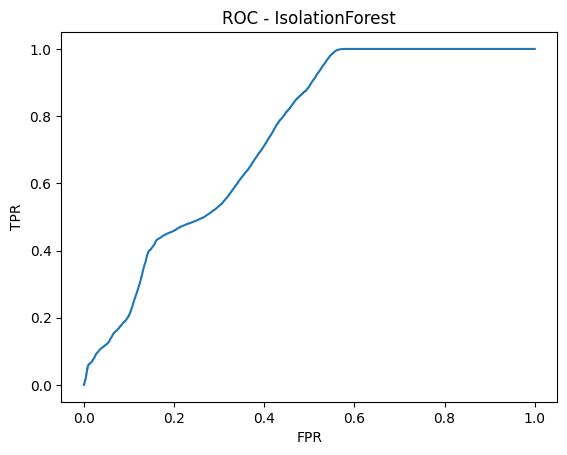

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
y_true = y_binary.values

print("KMeans report:")
print(classification_report(y_true, is_anom_km, digits=4))

print("IsolationForest report:")
print(classification_report(y_true, iso_pred, digits=4))

roc_auc_iso = roc_auc_score(y_true, iso_scores)
print("IsolationForest ROC AUC:", roc_auc_iso)

fpr, tpr, _ = roc_curve(y_true, iso_scores)
plt.plot(fpr, tpr); plt.title("ROC - IsolationForest"); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [100,200],
    'contamination': [0.01, 0.05, 0.1],
    'max_samples': ['auto', 0.5]
}

best = {'f1': -1}
from sklearn.metrics import f1_score
for params in ParameterGrid(param_grid):
    est = IsolationForest(n_estimators=params['n_estimators'],
                          contamination=params['contamination'],
                          max_samples=params['max_samples'],
                          random_state=42)
    est.fit(X_scaled)
    pred = (est.predict(X_scaled) == -1).astype(int)
    f1 = f1_score(y_true, pred, pos_label=1)
    if f1 > best['f1']:
        best = {'f1': f1, 'params': params, 'estimator': est}
print("Best params:", best['params'], "best F1:", best['f1'])


Best params: {'contamination': 0.1, 'max_samples': 'auto', 'n_estimators': 200} best F1: 0.23631156286853486


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_fscore_support)
from sklearn.model_selection import train_test_split, ParameterGrid, StratifiedKFold


In [ ]:
# set your file names / paths
train_path = "KDDTrain+"   # or KDDTrain+.csv if you have it
test_path  = "KDDTest+"

# try common separators if you get parsing errors
df_train = pd.read_csv(train_path, header=None)
df_test  = pd.read_csv(test_path, header=None)

df = pd.concat([df_train, df_test], ignore_index=True)
print("combined shape:", df.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'KDDTrain+'